In [1]:
import json
import cv2
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [104]:
info_dict = {1 : 0, #left_hip
             2 : 1, #left_knee
             3 : 2, #left_ankle
             6 : 3, #right_hip
             7 : 4, #right_knee
             8 : 5, #right_ankle
             14 : 6, #left_shoulder
             15 : 7, #left_elbow
             16 : 8, #left_wrist
             19 : 9, #right_shoulder
             20 : 10, #right_elbow
             21 : 11, #right_wrist
             24 : 12, #nose
             25 : 13, #left_eye
             26 : 14, #right_eye
             27 : 15, #left_ear
             28 : 16} #right_ear

connect_point = [[1,2,3], #왼쪽다리
                 [6,7,8], #오른쪽다리
                 [14,15,16], #왼쪽팔
                 [19,20,21], # 오른쪽팔
                 [28,26,24,25,27],# 눈코입
                 [1,6,19,14,1]] #몸통

vec_point = [[1,2],[2,3], #왼쪽다리
             [6,7],[7,8], #오른쪽다리
             [14,15],[15,16], #왼쪽팔
             [19,20],[20,21], # 오른쪽팔
             [24,25],[24,26],[24,27],[24,28],# 눈코입
             [6,14],[1,19]] #몸통

class VideoMetric():
    def __init__(self, width, height):
        self.width = width
        self.height = height
        
    def drawimg(self,point_json, connect_point=connect_point, info_dict = info_dict, save = False):
        point = list(point_json.values())
        img = np.zeros([self.height,self.width])+255
        for parts in connect_point:
            for i in range(len(parts)-1):
                p = info_dict[parts[i]]
                q = info_dict[parts[i+1]]
                cv2.line(img, (int(point[p][0]*self.width), int(point[p][1]*self.height)), (int(point[q][0]*self.width), int(point[q][1]*self.height)), (0,0,0), 3)
        if save:
            os.makedirs(save, exist_ok=True)
            plt.imsave(save+f'/{point[-1]}.png', img, cmap='gray')
        else : plt.imshow(img, cmap='gray')

    def extract_vec(self, point_json, info_dict = info_dict, vec_point=vec_point):
        point = list(point_json.values())
        output_vecs = []
        for parts in vec_point:
            for i in range(len(parts)-1):
                p = info_dict[parts[i]]
                q = info_dict[parts[i+1]]
                x1,y1 = int(point[p][0]*self.width), int(point[p][1]*self.height)
                x2,y2 = int(point[q][0]*self.width), int(point[q][1]*self.height)
                output_vecs.append((x2-x1,y2-y1))
        return output_vecs

    def extract_vec(self, point_json, info_dict = info_dict, vec_point=vec_point):
        point = list(point_json.values())
        output_vecs = []
        for parts in vec_point:
            for i in range(len(parts)-1):
                p = info_dict[parts[i]]
                q = info_dict[parts[i+1]]
                x1,y1 = int(point[p][0]*self.width), int(point[p][1]*self.height)
                x2,y2 = int(point[q][0]*self.width), int(point[q][1]*self.height)
                output_vecs.append((x2-x1,y2-y1))
        return output_vecs
    
    
def flow_part_vec(before_point_json, point_json, vec_point = vec_point):
    point_before = list(before_point_json.values())
    point = list(point_json.values())
    output_vecs = []
    for parts in vec_point:
        for i in range(len(parts)-1):
            p = info_dict[parts[i]]
            q = info_dict[parts[i+1]]
            x1,y1 = int(point[p][0]*self.width), int(point[p][1]*self.height)
            x2,y2 = int(point[q][0]*self.width), int(point[q][1]*self.height)
            output_vecs.append((x2-x1,y2-y1))
            
    output_flow = []
    for i in range(len(before_point_json)):
        output_flow.append((now_point[i][0]-befo_point[i][0],now_point[i][1]-befo_point[i][1]))
    return output_flow
    
    
def flow_vec(before_point_json, point_json, vec_point = vec_point):
    befo_point = before_point_json
    now_point = point_json
#     befo_point = extract_vec(before_point_json, vec_point)
#     now_point = extract_vec(point_json, vec_point)
    output_flow = []
    for i in range(len(before_point_json)):
        output_flow.append((now_point[i][0]-befo_point[i][0],now_point[i][1]-befo_point[i][1]))
    return output_flow

def l2_normalize(gt, target):
    output = []
    for i in range(len(gt)):
        x1,y1 = np.abs(gt[i][0] - target[i][0]), np.abs(gt[i][1] - target[i][1])
        output.append(np.linalg.norm((x1,y1)))
    return np.average(output)

def cosine_similar(gt, target):
    output = []
    for i in range(len(gt)):
        if np.linalg.norm(gt[i])!=0 and np.linalg.norm(target[i]) != 0:
            c_s = np.dot(gt[i],target[i])/(np.linalg.norm(gt[i])*np.linalg.norm(target[i]))
            output.append(c_s)
    return np.average(output)

## Cosine Similarity

In [5]:
swf2 = VideoMetric(1280,720)
swf2test = VideoMetric(368,640)

In [94]:
i = 10
total = []
for i in range(0,800,100): 000~ 900 29
    with open(f'save_json/swf2test.mp4/{i:0>3}.json') as json_file:
        json_swf2test = json.load(json_file)
    gt = swf2test.extract_vec(json_swf2test)
    o_cs=[]
    for t in range(200,500): 000~1795  255
        with open(f'save_json/swf2.mp4/{t:0>3}.json') as json_file:
            json_swf2 = json.load(json_file)
        target = swf2.extract_vec(json_swf2)
        o_cs.append(cosine_similar(gt, target))
    total.append(o_cs)

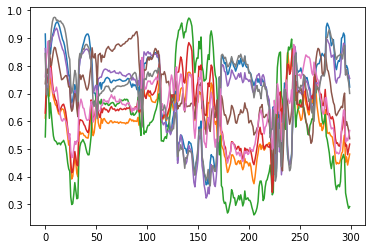

In [95]:
for i in range(len(total)):
    ax = sns.lineplot(x=range(len(total[i])),y=total[i])

In [3]:
swf2 = VideoMetric(1280,720)
swf2test = VideoMetric(368,640)

In [82]:
i=29
t=255
with open(f'save_json/swf2test.mp4/{i:0>3}.json') as json_file:
    json_swf2test = json.load(json_file)
with open(f'save_json/swf2.mp4/{t:0>3}.json') as json_file:
    json_swf2 = json.load(json_file)

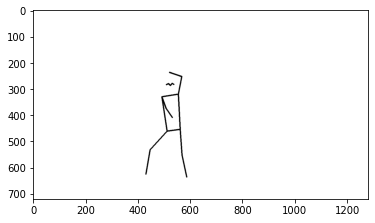

In [83]:
swf2.drawimg(json_swf2)

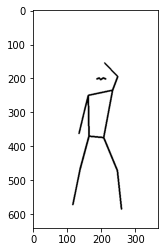

In [84]:
swf2test.drawimg(json_swf2test)

In [85]:
swf2_vec = swf2.extract_vec(json_swf2)
swf2test_vec = swf2test.extract_vec(json_swf2test)
cosine_similar(swf2_vec,swf2test_vec)

0.9342948247916161

In [78]:
i=10
t=214
with open(f'save_json/swf2test.mp4/{i:0>3}.json') as json_file:
    json_swf2test = json.load(json_file)
with open(f'save_json/swf2.mp4/{t:0>3}.json') as json_file:
    json_swf2 = json.load(json_file)

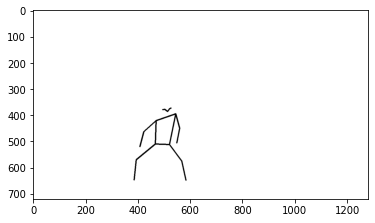

In [79]:
swf2.drawimg(json_swf2)

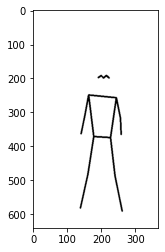

In [80]:
swf2test.drawimg(json_swf2test)

In [81]:
swf2_vec = swf2.extract_vec(json_swf2)
swf2test_vec = swf2test.extract_vec(json_swf2test)
cosine_similar(swf2_vec,swf2test_vec)

0.9252886348139675

In [86]:
i=10
t=200
with open(f'save_json/swf2test.mp4/{i:0>3}.json') as json_file:
    json_swf2test = json.load(json_file)
with open(f'save_json/swf2.mp4/{t:0>3}.json') as json_file:
    json_swf2 = json.load(json_file)

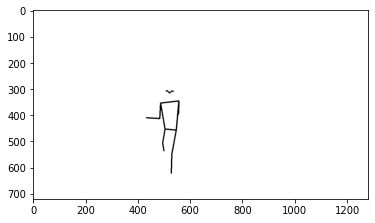

In [87]:
swf2.drawimg(json_swf2)

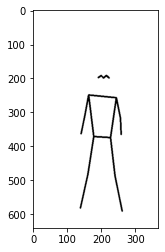

In [88]:
swf2test.drawimg(json_swf2test)

In [89]:
swf2_vec = swf2.extract_vec(json_swf2)
swf2test_vec = swf2test.extract_vec(json_swf2test)
cosine_similar(swf2_vec,swf2test_vec)

0.9002194890513565

## L2 Norm

In [119]:
swf2 = VideoMetric(1280,720)
swf2test = VideoMetric(368,640)

In [120]:
i = 10
total = []
for i in range(0,800,100):
    with open(f'save_json/swf2test.mp4/{i:0>3}.json') as json_file:
        json_swf2test = json.load(json_file)
    gt = swf2test.extract_vec(json_swf2test)
    o_cs=[]
    for t in range(200,500):
        with open(f'save_json/swf2.mp4/{t:0>3}.json') as json_file:
            json_swf2 = json.load(json_file)
        target = swf2.extract_vec(json_swf2)
        o_cs.append(l2_normalize(gt, target))
    total.append(o_cs)

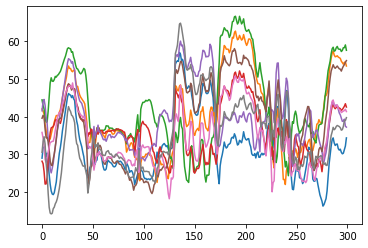

In [121]:
for i in range(len(total)):
    ax = sns.lineplot(x=range(len(total[i])),y=total[i])

## flow vec

In [96]:
swf2 = VideoMetric(1280,720)
swf2test = VideoMetric(368,640)

In [116]:
i = 10
total = []
o_flow = []
for i in range(29,800):
    with open(f'save_json/swf2test.mp4/{i-5:0>3}.json') as json_file:
        json_swf2test_before = json.load(json_file)
    with open(f'save_json/swf2test.mp4/{i:0>3}.json') as json_file:
        json_swf2test = json.load(json_file)
    temp = []
    b = swf2test.extract_vec(json_swf2test_before)
    a = swf2test.extract_vec(json_swf2test)
    for v in range(14):
        temp.append(np.linalg.norm(flow_vec(b,a,vec_point)[v]))
    avg = np.average(temp)
    o_flow.append(avg)

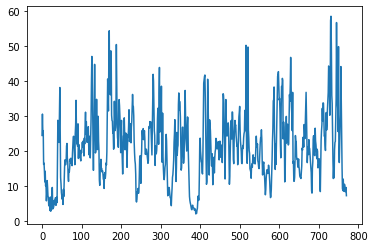

In [117]:
ax = sns.lineplot(x=range(len(o_flow)),y=o_flow)

In [123]:
i = 10
total = []
o_flow = []
for i in range(255,1000):
    with open(f'save_json/swf2.mp4/{i-5:0>3}.json') as json_file:
        json_swf2_before = json.load(json_file)
    with open(f'save_json/swf2.mp4/{i:0>3}.json') as json_file:
        json_swf2 = json.load(json_file)
    temp = []
    b = swf2.extract_vec(json_swf2_before)
    a = swf2.extract_vec(json_swf2)
    for v in range(14):
        temp.append(np.linalg.norm(flow_vec(b,a,vec_point)[v]))
    avg = np.average(temp)
    o_flow.append(avg)

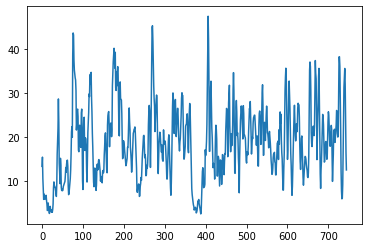

In [124]:
ax = sns.lineplot(x=range(len(o_flow)),y=o_flow)

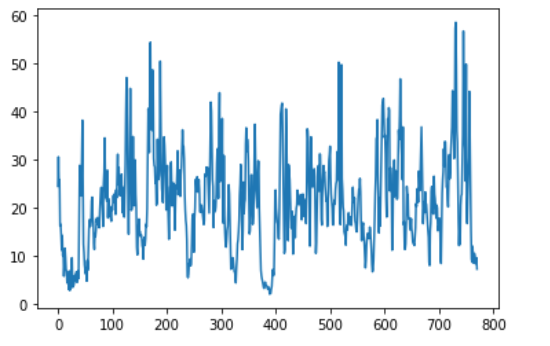

## 원본 영상 Test

In [126]:
swf2 = VideoMetric(1280,720)
swf2test = VideoMetric(368,640)

In [141]:
i = 10
total = []
for i in range(0,800,50):
    with open(f'save_json/swf2.mp4/{i:0>3}.json') as json_file:
        json_swf2test = json.load(json_file)
    gt = swf2.extract_vec(json_swf2test)
    o_cs=[]
    for t in range(0,800):
        with open(f'save_json/swf2.mp4/{t:0>3}.json') as json_file:
            json_swf2 = json.load(json_file)
        target = swf2.extract_vec(json_swf2)
        o_cs.append(l2_normalize(gt, target))
    total.append(o_cs)

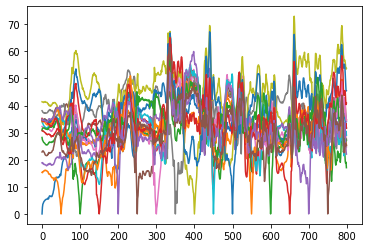

In [142]:
for i in range(len(total)):
    ax = sns.lineplot(x=range(len(total[i])),y=total[i])

In [143]:
i = 10
total = []
for i in range(0,800,50):
    with open(f'save_json/swf2.mp4/{i:0>3}.json') as json_file:
        json_swf2test = json.load(json_file)
    gt = swf2.extract_vec(json_swf2test)
    o_cs=[]
    for t in range(0,800):
        with open(f'save_json/swf2.mp4/{t:0>3}.json') as json_file:
            json_swf2 = json.load(json_file)
        target = swf2.extract_vec(json_swf2)
        o_cs.append(cosine_similar(gt, target))
    total.append(o_cs)

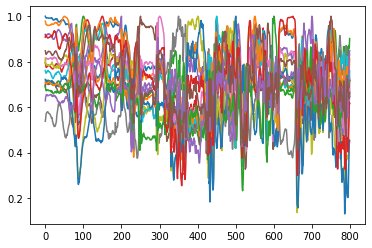

In [144]:
for i in range(len(total)):
    ax = sns.lineplot(x=range(len(total[i])),y=total[i])

## Scoring

In [179]:
i = 10
a=15
total = []
for p in range(0,50):
    for i in range(29+a*p,39+a*p,a):
        with open(f'save_json/swf2test.mp4/{i:0>3}.json') as json_file:
            json_swf2test = json.load(json_file)
        gt = swf2test.extract_vec(json_swf2test)
        o_cs=[]
        for t in range(245+a*p,265+a*p):
            with open(f'save_json/swf2.mp4/{t:0>3}.json') as json_file:
                json_swf2 = json.load(json_file)
            target = swf2.extract_vec(json_swf2)
            o_cs.append(l2_normalize(gt, target))
        total.append(np.max(o_cs))

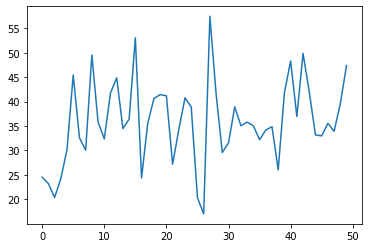

In [180]:
ax = sns.lineplot(x=range(len(total)),y=total)